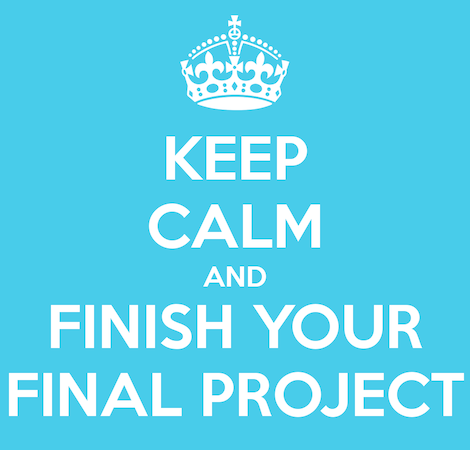

# Overview

<p style="line-height:1.75;font-size:16px">
It's time to put your skills to the test and take on a real-world data science project. You are given a dataset of ad impressions for Android users for a particular ad. Each line represents one impression for that ad and includes details such as timestamp, device, mobile carrier and more.

In [1]:
import pandas as pd

data = pd.read_csv('data/android_bids_us.csv')
data.head()
#data=data[:100000]

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,1536444331894,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,NaN,7.0,720,1280,chartboost,0
1,9284441f-a6ea-4698-9017-86436b92d416,1536444363932,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,NaN,7.0,1280,720,chartboost,0
2,7e4779c2-f757-4324-8c2a-138b558b5a54,1536444386908,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,NaN,7.1.1,720,1280,chartboost,0
3,b64ea208-38ca-42ac-895e-0842d7352cc3,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,NaN,6.0.1,720,1280,chartboost,0
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,1536444443458,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,NaN,7.1.1,1024,768,chartboost,0


<p style="line-height:1.75;font-size:16px">
Your task is to predict if a user will click or not on the ad.

# Guidelines

<p style="line-height:1.75;font-size:16px">
You will have two weeks to complete this project during which we will have two half-days dedicated to this. Besides giving you the chance to gain experience and showcase what you've learned, this project is intended to give you a glimpse into the actual process and work of a data scientist.<br> Before we talk about the task itself, here are some important guidelines:<br>
1\. <b>Show your work</b> - if you've tried something and it didn't work that's fine, don't delete it. Data science is an iterative process and we can learn a lot from what didn't work. Explain what didn't work and the reasons for it.<br>
2\. <b>Explain your work</b> - don't just write a bunch of code and the final output. Explain the motivation for each step you take, describe the results you got and what they mean. <br>
3\. <b>Use visualizations</b> - while exploring the data or when trying to convey an important message, use plots to help you. That being said, don't force yourself to add plots if they're not really needed.<br>
4\. <b>Plan ahead</b> - if you start working on the project near the submission date you will have less time to ask questions and come up with ideas.<br>
5\. <b>Google is your friend</b> - while we've learned the basic skills required to complete this project, there are many other techniques and ideas we didn't have time to talk about. Don't limit yourself to the lessons, search for similar problems and how to approach them, exchange ideas with colleagues and don't be afraid to try new ideas. <br>
6\. <b>It's not about the score</b> - while reaching a good prediction score is nice, it's not the main purpose of this project. Use this project to show your understanding and reasoning as well as your technical skills.<br>
7\. <b>Write clean code</b> - make sure you write code that is easy to read and understand. Give meaningful names, use functions, add comments if needed.<br>
8\. <b>Test before submission</b> - your work should be submitted as a Jupyter Notebook. Before submitting it, make sure you run it from start to finish and verify that there are no errors.<br>
9\. <b>Enjoy it</b> - try to have fun working on this, be curious, look for interesting insights and take pride in completing a real-world project end-to-end.

# Tips

<p style="line-height:1.75;font-size:16px">
1\. Since the data is time sensitive, split it so that the test data will be the last month of data and the training data will be anything that came before that.<br>
2\. `play_apps.zip` is data from Google Play about the various apps in the dataset. You can use this to augment the impressions dataset.<br>
3\. The data is collected from customers in the US (multiple timezones).<br>

In [2]:
# I used google to find a convertor to timezone
!pip install us 


<div style="line-height:1.75;background:#1e7b1e;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px"><i style="font-size:40px;color:#c1f0c1;">Solution Description</i>
   
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#c1f0c1;padding:20px;border-radius:0px 0px 5px 5px">
The solution is divided into few stages:<br>
1. <b>Exploratory Analysis</b> - Learnning the data, understanding each feature and its efect on the "click" column.<br>
2. <b>Clean Data</b> - Some columns are meanless unless we divide them, classify them, or enrich them. For example
   <br><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;utc_time</b> - I choose to split it into is_weekend?, Month, Hour  and date
   <br><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;app_id</b> - I choose to replace it with data in zip files. <br>
3. <b>Feature Selection</b> - I used "DesictionTree" and "Recursive Feature Elimination" - to check the influence of each column on "click" column.<br>
4. <b>Balance- using undersample to fix imblance data.</b><br>
5. <b>Run the Classifiers</b> - I used "Logistic regresstion", "DecisionTreeClassifier", "RandomForestClassifier" <br>


</div>

In [3]:
## imports
import seaborn as sns
import pandas as pd
import numpy as np
import pytz
import datetime
from datetime import  timezone
import datetime

import us
import matplotlib.pyplot as plt
%matplotlib inline

## Exploratory Analysis & Clean Data

In [4]:
data.info()
#we can see we have columns that are categorial

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3148828 entries, 0 to 3148827
Data columns (total 12 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   bidid          object
 1   utc_time       int64 
 2   app_id         object
 3   user_state     object
 4   user_isp       object
 5   device_maker   object
 6   device_model   object
 7   device_osv     object
 8   device_height  int64 
 9   device_width   int64 
 10  marketplace    object
 11  click          int64 
dtypes: int64(4), object(8)
memory usage: 288.3+ MB


In [5]:
data.user_state.unique()  # see all posible states

array(['TX', 'LA', 'TN', 'NC', 'FL', 'GA', 'ME', 'UT', 'OH', 'MN', 'IL',
       'WA', 'IN', 'MO', 'ID', 'VA', 'NJ', 'AZ', 'RI', 'DC', 'CA', 'WI',
       'AL', 'MS', 'CT', 'MD', 'NY', 'PA', 'MI', 'CO', 'MA', 'ND', 'KY',
       'WY', 'IA', 'DE', 'AR', 'OK', 'KS', 'SC', 'NM', 'HI', 'NH', 'NV',
       'AK', 'MT', 'SD', 'NE', 'OR', 'WV', 'VT'], dtype=object)

In [6]:


# create dict for all timezones (in order to save calculation time)
all_posible_states = data.user_state.unique()
dict_state_to_timezone = {}
for nState in all_posible_states:
    dict_state_to_timezone[nState] = us.states.lookup(nState).capital_tz


dict_state_to_timezone

{'TX': 'America/Chicago',
 'LA': 'America/Chicago',
 'TN': 'America/Chicago',
 'NC': 'America/New_York',
 'FL': 'America/New_York',
 'GA': 'America/New_York',
 'ME': 'America/New_York',
 'UT': 'America/Denver',
 'OH': 'America/New_York',
 'MN': 'America/Chicago',
 'IL': 'America/Chicago',
 'WA': 'America/Los_Angeles',
 'IN': 'America/Indiana/Indianapolis',
 'MO': 'America/Chicago',
 'ID': 'America/Denver',
 'VA': 'America/New_York',
 'NJ': 'America/New_York',
 'AZ': 'America/Phoenix',
 'RI': 'America/New_York',
 'DC': 'America/New_York',
 'CA': 'America/Los_Angeles',
 'WI': 'America/Chicago',
 'AL': 'America/Chicago',
 'MS': 'America/Chicago',
 'CT': 'America/New_York',
 'MD': 'America/New_York',
 'NY': 'America/New_York',
 'PA': 'America/New_York',
 'MI': 'America/New_York',
 'CO': 'America/Denver',
 'MA': 'America/New_York',
 'ND': 'America/North_Dakota/Center',
 'KY': 'America/New_York',
 'WY': 'America/Denver',
 'IA': 'America/Chicago',
 'DE': 'America/New_York',
 'AR': 'America/Ch

In [7]:
from datetime import datetime
def convert_utc_time(r):
    tzone, timestamp = r.split('@')
    x = datetime.fromtimestamp(float(timestamp)/1000).replace(tzinfo=timezone.utc).astimezone(pytz.timezone(tzone)).timetuple()
    return list(x)[0:4]

data['TZ'] = data.apply(lambda r: dict_state_to_timezone[r['user_state']] + '@' + str(r['utc_time']), axis=1)
data['year'], data['month'] ,data['day'],data['hour']= zip(*data['TZ'].map(convert_utc_time))
data.drop('TZ',axis=1,inplace=True)
data.drop('utc_time',axis=1,inplace=True)
data

,bidid,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click,year,month,day,hour
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,NaN,7.0,720,1280,chartboost,0,2018,9,8,20
1,9284441f-a6ea-4698-9017-86436b92d416,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,NaN,7.0,1280,720,chartboost,0,2018,9,8,20
2,7e4779c2-f757-4324-8c2a-138b558b5a54,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,NaN,7.1.1,720,1280,chartboost,0,2018,9,8,20
3,b64ea208-38ca-42ac-895e-0842d7352cc3,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,NaN,6.0.1,720,1280,chartboost,0,2018,9,8,20
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,NaN,7.1.1,1024,768,chartboost,0,2018,9,8,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3148823,a38d5eba-ad93-430e-8323-dd8ea0d713a2,com.altitude.rrsv,TX,T-Mobile USA,Samsung,SM-J327T1,7.0,720,1280,chartboost,0,2018,11,5,22
3148824,f4cb0a53-c02c-43a2-9d44-fcd79f18127e,com.slots.realvegas,GA,Mediacom Cable,NaN,NaN,8.1.0,1920,1080,chartboost,0,2018,11,5,23
3148825,6c9a06ab-29ac-445d-b4e0-e7ebe66ce2b1,br.com.tapps.penguinevolution,MO,Sprint PCS,LG,SP200,7.1.2,1280,720,chartboost,0,2018,11,5,22
3148826,df975817-8218-4709-a9c0-e1d56c4a63b4,air.com.FDGEntertainment.Lonewolf.gp,WI,Spectrum,Motorola,Moto G Plus (5th Gen.),7.0,1080,1920,chartboost,0,2018,11,5,22


In [8]:
import datetime
def is_weekend(y,m,d):
    weekday = datetime.datetime(y, m, d).weekday()

    if weekday < 5:
        return 0
    else:  # 5 Sat, 6 Sun
        return 1

data['is_weekend'] = data.apply(lambda r :is_weekend(r['year'], r['month'], r['day']), axis=1)
data.drop(['day'], axis=1, inplace=True)

In [9]:
x=data['year'].value_counts()
#all columns are in 2018- no need for year
data.drop(['year'], axis=1, inplace=True)


## after converting date and adding new column of weekend ,we want to analyze data to see if we can remove columns

In [10]:
data['device_size'] = data['device_height']*data['device_width']
# we create new columns device_size so no need for device_width and device_height
data.drop(['device_width'], axis=1, inplace=True)
data.drop(['device_height'], axis=1, inplace=True)



In [11]:
# Assigning columns as numerical variables
numeric_cols = ['device_size', 'click', 'hour','month','is_weekend']
data[numeric_cols].describe()

,device_size,click,hour,month,is_weekend
count,3.148828e+06,3.148828e+06,3.148828e+06,3.148828e+06,3.148828e+06
mean,1.358944e+06,6.770741e-02,1.280120e+01,9.501065e+00,3.305106e-01
std,8.280512e+05,2.512432e-01,6.897424e+00,9.406001e-01,4.703971e-01
min,3.500000e+02,0.000000e+00,0.000000e+00,8.000000e+00,0.000000e+00
25%,9.216000e+05,0.000000e+00,7.000000e+00,9.000000e+00,0.000000e+00
50%,9.216000e+05,0.000000e+00,1.400000e+01,1.000000e+01,0.000000e+00
75%,2.073600e+06,0.000000e+00,1.900000e+01,1.000000e+01,1.000000e+00
max,4.492800e+06,1.000000e+00,2.300000e+01,1.100000e+01,1.000000e+00


In [12]:
# Assigning columns as categorical variables
Categorical_cols = [ 'bidid', 'app_id', 'user_state', 'user_isp', 'device_maker' ,'device_model', 'device_osv','marketplace' ]
data[Categorical_cols].describe(include = ['O'])
# Decribe method is used to give statistical information on the categorical columns

,bidid,app_id,user_state,user_isp,device_maker,device_model,device_osv,marketplace
count,3148828,3148828,3148828,3148789,2184824,2184970,3148828,3148828
unique,2936921,14869,51,3449,265,2342,20,1
top,32fff627-3a91-412e-8f27-f5c818fbc415,com.banananadco.blackjack,TX,T-Mobile USA,Samsung,LM-X210(G),7.0,chartboost
freq,2,54134,409365,737204,863542,110596,1083916,3148828


In [13]:
data.isnull().sum()

bidid                0
app_id               0
user_state           0
user_isp            39
device_maker    964004
device_model    963858
device_osv           0
marketplace          0
click                0
month                0
hour                 0
is_weekend           0
device_size          0
dtype: int64


####  marketplace isn't unique.
#### bidid -  many different bidid (Unique) and also not many people belonging to a same bidid(freq). So, it probably means that this feature is having no or very less predictive power.

In [14]:
data.drop(['marketplace'], axis=1, inplace=True)
data.drop('bidid', axis=1, inplace=True)
#bidid is almost an index

#data.drop('device_maker', axis=1, inplace=True)

In [15]:
#check for unique ids
print(f'user_isp {len(data["user_isp"].unique())}')
print(f'device_maker {len(data["device_maker"].unique())}')
print(f'device_model {len(data["device_model"].unique())}')
print(f'device_osv {len(data["device_osv"].unique())}')


user_isp 3450
device_maker 266
device_model 2343
device_osv 20


In [16]:
#device_maker and device_model - close to 1/3 of the data is missing, given the ratio of table size(3148828)
# to much unique 
data.drop('device_model', axis=1, inplace=True)

In [17]:
#Fill NaN for columns
data['user_isp'].fillna('unknown', inplace=True)

In [18]:
#normelize_data.info()


In [19]:
data.duplicated().sum() # displays duplicate records

438812

In [20]:
#check if user_state as influnce 
pd.crosstab(data['user_state'],data['click']).sort_values(1,0, ascending = False).head(10)

click,0,1
user_state,,
CA,366955,27647
TX,382168,27197
FL,245078,18129
IL,181598,12781
NY,167995,12551
GA,118463,8678
MI,112631,8317
NC,112383,8207
OH,95577,6886


## Distribution and Relationship Between Variables

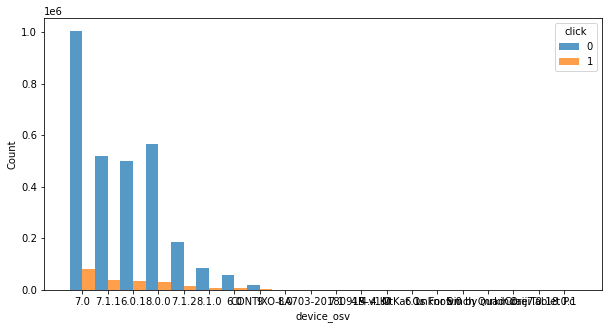

In [21]:

fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=data, x='device_osv', hue='click', stat='count',multiple="dodge", edgecolor=None)
plt.show()

##we can see that device_osv has influnce on click on ad

In [22]:
#x=data.groupby('device_osv').apply(lambda x: ['click'] ==1)x

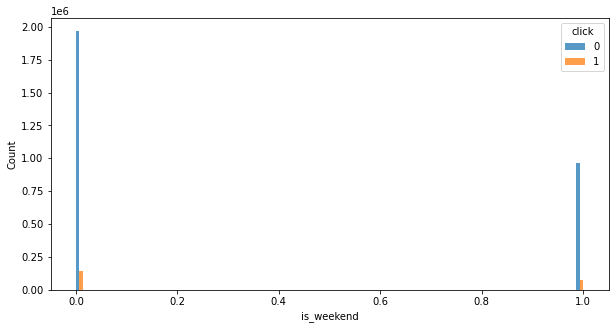

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=data, x='is_weekend', hue='click', stat='count',multiple="dodge", edgecolor=None)
plt.show()

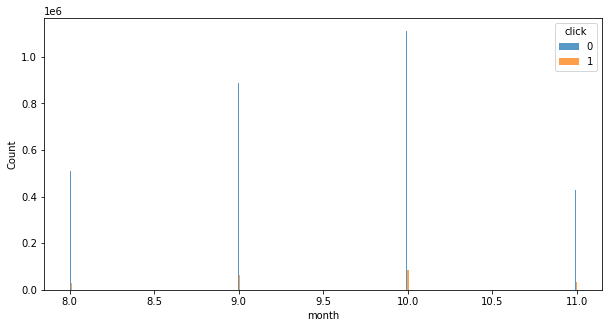

In [24]:
 #Creating a pairplot with hue defined by Clicked on Ad column
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=data, x='month', hue='click', stat='count',multiple="dodge", edgecolor=None)
plt.show() 

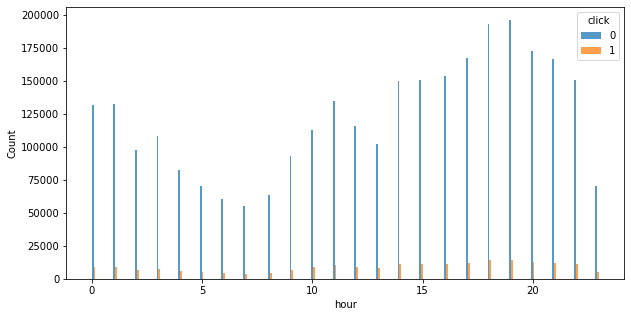

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=data, x='hour', hue='click', stat='count',multiple="dodge", edgecolor=None)
plt.show()

In [26]:
#import matplotlib.pyplot as plt 
#fig = plt.figure(figsize = (12,10))
#sns.heatmap(data[].corr(), cmap='Blues', annot = True)

In [27]:
#Check if data is balance - no balance data
sumzero= (data['click'] == 0).sum()
sumone= (data['click'] == 1).sum()
print(f'zero sum  {sumzero} and one sum {sumone}')

zero sum  2935629 and one sum 213199


In [28]:
data

,app_id,user_state,user_isp,device_maker,device_osv,click,month,hour,is_weekend,device_size
0,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,7.0,0,9,20,1,921600
1,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,7.0,0,9,20,1,921600
2,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,7.1.1,0,9,20,1,921600
3,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,6.0.1,0,9,20,1,921600
4,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,7.1.1,0,9,21,1,786432
...,...,...,...,...,...,...,...,...,...,...
3148823,com.altitude.rrsv,TX,T-Mobile USA,Samsung,7.0,0,11,22,0,921600
3148824,com.slots.realvegas,GA,Mediacom Cable,NaN,8.1.0,0,11,23,0,2073600
3148825,br.com.tapps.penguinevolution,MO,Sprint PCS,LG,7.1.2,0,11,22,0,921600
3148826,air.com.FDGEntertainment.Lonewolf.gp,WI,Spectrum,Motorola,7.0,0,11,22,0,2073600


In [29]:
data['app_id'].value_counts()

com.banananadco.blackjack                54134
com.kiloo.subwaysurf                     53670
toy.blast.pop.cubes.puzzle               49726
com.blackcircleapps.halloweenbingo       49273
com.mobilityware.spider                  44715
                                         ...  
com.gamex.chainedcarimpossibledriving        1
com.eerylab.mazeforever                      1
com.mishitaodu.evilkisgwers                  1
com.theonegames.gunshipbattle                1
com.appinmob.alibaba                         1
Name: app_id, Length: 14869, dtype: int64

In [31]:
from zipfile import ZipFile
import pickle
from tqdm import tqdm_notebook as tqdm

app_details = ZipFile("data/play_apps.zip")

categories = []
scores = []
reviews_list = []
free_list = []
for app_id in tqdm(data.app_id):
    try:
        app_file = 'play_apps/' + app_id
        app = pickle.loads(app_details.read(app_file))
        value = app['category']
        score = float(app['score'])
        reviews = app['reviews']
        free = int(app['free'])
    except:
        value = []
        score = 0.0
        reviews = 0
        free = 0 # I assume Free apps get more banner, so default is paid app
    finally:
        categories.append(value)
        scores.append(score)
        reviews_list.append(reviews)
        free_list.append(free)

<ipython-input-31-3e4881cf961d>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for app_id in tqdm(data.app_id):


In [32]:
data['category'] = pd.Series(categories, index =data['app_id'].index)
data['scores'] = pd.Series(scores, index =data['app_id'].index)
data['reviews'] = pd.Series(reviews_list, index =data['app_id'].index)
data['free'] = pd.Series(free_list, index =data['app_id'].index)

In [33]:
data

,app_id,user_state,user_isp,device_maker,device_osv,click,month,hour,is_weekend,device_size,category,scores,reviews,free
0,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,7.0,0,9,20,1,921600,[GAME_SIMULATION],4.3,155129,1
1,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,7.0,0,9,20,1,921600,[GAME_CARD],4.7,11927,1
2,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,7.1.1,0,9,20,1,921600,[GAME_ARCADE],4.1,178,1
3,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,6.0.1,0,9,20,1,921600,[],0.0,0,0
4,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,7.1.1,0,9,21,1,786432,"[GAME_EDUCATIONAL, FAMILY_BRAINGAMES]",3.6,35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3148823,com.altitude.rrsv,TX,T-Mobile USA,Samsung,7.0,0,11,22,0,921600,[GAME_ACTION],4.3,18839,1
3148824,com.slots.realvegas,GA,Mediacom Cable,NaN,8.1.0,0,11,23,0,2073600,[GAME_CASINO],4.6,15165,1
3148825,br.com.tapps.penguinevolution,MO,Sprint PCS,LG,7.1.2,0,11,22,0,921600,[GAME_CASUAL],4.6,17264,1
3148826,air.com.FDGEntertainment.Lonewolf.gp,WI,Spectrum,Motorola,7.0,0,11,22,0,2073600,[GAME_ADVENTURE],4.6,303827,1


### MultiLabelBinarizer

In [34]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_mlb = mlb.fit_transform(data['category'])
data = pd.concat([data, pd.DataFrame(genre_mlb, columns=mlb.classes_)], axis=1)
data

,app_id,user_state,user_isp,device_maker,device_osv,click,month,hour,is_weekend,device_size,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,7.0,0,9,20,1,921600,...,0,0,0,0,0,0,0,0,0,0
1,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,7.0,0,9,20,1,921600,...,0,0,0,0,0,0,0,0,0,0
2,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,7.1.1,0,9,20,1,921600,...,0,0,0,0,0,0,0,0,0,0
3,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,6.0.1,0,9,20,1,921600,...,0,0,0,0,0,0,0,0,0,0
4,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,7.1.1,0,9,21,1,786432,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3148823,com.altitude.rrsv,TX,T-Mobile USA,Samsung,7.0,0,11,22,0,921600,...,0,0,0,0,0,0,0,0,0,0
3148824,com.slots.realvegas,GA,Mediacom Cable,NaN,8.1.0,0,11,23,0,2073600,...,0,0,0,0,0,0,0,0,0,0
3148825,br.com.tapps.penguinevolution,MO,Sprint PCS,LG,7.1.2,0,11,22,0,921600,...,0,0,0,0,0,0,0,0,0,0
3148826,air.com.FDGEntertainment.Lonewolf.gp,WI,Spectrum,Motorola,7.0,0,11,22,0,2073600,...,0,0,0,0,0,0,0,0,0,0


## feature selection

In [35]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

test_data= data[:2000]
num_cols = ['click', 'device_size','month', 'hour']
cat_cols = ['user_isp','device_maker','device_osv']

data_for_feature = pd.concat([test_data[num_cols], pd.get_dummies(test_data[cat_cols])], axis=1)
y = data_for_feature['click']
X = data_for_feature.drop('click', axis=1)
dt_selector = SelectFromModel(DecisionTreeClassifier(max_depth=5), max_features=15)
dt_selector.fit(X, y)

dt_support = dt_selector.get_support()
dt_features = X.loc[:, dt_support].columns.tolist()
for f in dt_features:
    print(f)

month
hour
user_isp_MATI
user_isp_Northland Communications
user_isp_Vermont Telephone Company
device_maker_Kakatech


In [36]:
import numpy as np

def correlation_selector(X, y, features_num):
    correlations = []
    feature_names = X.columns

    for i in feature_names:
        correlation = np.corrcoef(X[i], y)[0, 1]
        correlations.append(correlation)
    
    # replace NaN with 0
    correlations = [0 if np.isnan(correlation) else correlation for correlation in correlations]
    feature_correlations = list(zip(feature_names, correlations))
    feature_correlations = sorted(feature_correlations, key=lambda x: np.abs(x[1]), reverse=True)
    return feature_correlations[:30]
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
results = correlation_selector(X, y,30)

for r in results:
    print(f'{r[0]: <20} {r[1]:.3f}')

device_maker_Kakatech 0.099
month                0.098
user_isp_Vermont Telephone Company 0.088
user_isp_MATI        0.088
user_isp_Northland Communications 0.088
device_osv_7.1.1     0.060
device_maker_Unimax  0.058
user_isp_Conway Corporation 0.058
user_isp_West River Cooperative Telephone Company 0.058
user_isp_PenTeleData 0.058
device_maker_Sony    0.058
user_isp_Massillon Cable 0.058
device_maker_Motorola 0.052
device_maker_ZTE     0.046
user_isp_Grande Communications 0.044
user_isp_Windstream Communications 0.041
user_isp_Google Fiber 0.036
device_maker_LG      0.033
user_isp_Verizon Fios 0.030
user_isp_Fairpoint Communications 0.029
device_osv_9         0.029
device_maker_Google  0.029
user_isp_Frontier Communications -0.027
device_maker_HTC     -0.027
user_isp_Verizon Wireless 0.027
hour                 0.026
device_size          -0.025
user_isp_Hughes Network Systems 0.024
user_isp_AT&T Internet Services -0.024
user_isp_Cox Communications -0.024


### Conclution : the following column have the highest influence: device size, hour, user_isp and device maker 

In [37]:
data.drop('category',inplace=True, axis=1)
data.drop('app_id',inplace=True, axis=1)

In [38]:
# #user_isp is a sparse feature. Limit get_dummies feature space by removing small ISP
# from tqdm import tqdm_notebook as tqdm
# from sklearn.preprocessing import LabelEncoder
# significant_isp = 30000

# for isp in tqdm(data['user_isp'].unique()):
#     predicator = (data['user_isp'] == isp)
#     isp_count = predicator.sum()
#     if isp_count < significant_isp:
#         #print("Replacing {} with Generic. It's sum {}".format(maker, makers_count))
#         data.loc[predicator, 'user_isp'] = "small_isp"
        
# #Re-encoding
# le = LabelEncoder()
# le.fit(data['user_isp'])
# data['user_isp_en'] = le.transform(data['user_isp'])

# fig, ax = plt.subplots(figsize=(20, 10))
# sns.histplot(data=data, x='user_isp_en', hue='click', stat='count', edgecolor=None)
# plt.show()
# #data set are contributed by big ISP
# data.drop('user_isp_en', axis=1, inplace=True)

In [62]:
data = pd.read_csv('data/data_afterClean_before_getDummies.csv')

In [39]:
#data.to_csv('data/data_afterClean_before_getDummies.csv', index = False, header=True)

In [63]:
# - remove user_isp- we shuld think in better idea to save this columns -beacuse  feature selection  
print(f'user_isp {len(data["user_isp"].unique())}')

data.drop('user_isp',inplace=True, axis=1)

user_isp 13


In [65]:
data = pd.get_dummies(data)


MemoryError: Unable to allocate 1.38 GiB for an array with shape (59, 3148828) and data type int64

In [60]:
data
#data.to_csv('data/data_afterClean_after_getdummies.csv', index = False, header=True)

,click,month,hour,is_weekend,device_size,scores,reviews,free,ART_AND_DESIGN,AUTO_AND_VEHICLES,...,device_osv_8.0,device_osv_8.0.0,device_osv_8.0.1,device_osv_8.1.0,device_osv_9,device_osv_CONTIXO-LA703-20180915-v1.0,device_osv_M,device_osv_O,device_osv_P,device_osv_unknown
0,0,9,20,1,921600,4.3,155129,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,9,20,1,921600,4.7,11927,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,9,20,1,921600,4.1,178,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,9,20,1,921600,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,9,21,1,786432,3.6,35,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,9,8,0,921600,4.2,419460,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,9,8,0,409920,4.6,48899,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,9,9,0,921600,3.9,41769,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,10,17,0,921600,3.7,230200,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### imbalance data

In [43]:
#Try to handle imbalance
!pip install -U imbalanced-learn
!sudo python -m pip install imbalanced-learn
!sudo python -m pip install delayed

Requirement already up-to-date: imbalanced-learn in c:\users\hamilton\anaconda3\lib\site-packages (0.8.0)


'sudo' is not recognized as an internal or external command,
operable program or batch file.
'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [44]:
#data = pd.read_csv('data/data_afterClean_after_getdummies.csv')
#data= data[:200]

C:\Users\hamilton\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\hamilton\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


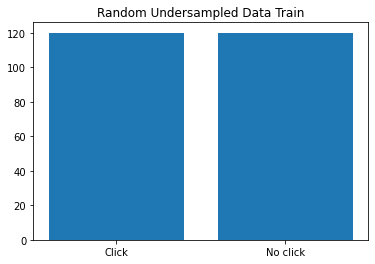

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler


#data = pd.read_csv('data/data_afterClean_after_getdummies.csv')
#data= data[:2000000]
X_train = data[data['month'] != 11]
X_train.drop('click', axis=1 ,inplace=True)
y_train = data[data['month'] != 11]['click']

X_test = data[data['month'] == 11]
X_test.drop('click', axis=1, inplace=True)
y_test = data[data['month'] == 11]['click']


#Since there are much more '0' clicks than '1' clicks, I will undersample 
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)


plt.bar(['Click', 'No click'], height=[sum(y_undersampled==0), sum(y_undersampled==1)])
plt.title('Random Undersampled Data Train')
plt.show()

,month,hour,is_weekend,device_size,scores,reviews,free,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,...,device_osv_8.0,device_osv_8.0.0,device_osv_8.0.1,device_osv_8.1.0,device_osv_9,device_osv_CONTIXO-LA703-20180915-v1.0,device_osv_M,device_osv_O,device_osv_P,device_osv_unknown
0,9,20,1,921600,4.3,155129,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,20,1,921600,4.7,11927,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,20,1,921600,4.1,178,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,20,1,921600,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,21,1,786432,3.6,35,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,9,8,0,921600,4.2,419460,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,9,8,0,409920,4.6,48899,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,9,9,0,921600,3.9,41769,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,10,17,0,921600,3.7,230200,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train the model

0      0
1      0
2      0
3      0
4      0
      ..
235    1
236    1
237    1
238    1
239    1
Name: click, Length: 240, dtype: int64

In [49]:
def fitPredictAndPrint(model, X_train, y_train, X_test, y_test, label):
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    print(label)
    print(confusion_matrix(y_true=y_test,y_pred=y_pred))
    print(classification_report(y_true=y_test, y_pred = y_pred))
    print("*****************************************************")
    
def predictAndPrint(model, X_test, y_test, label):
    y_pred = model.predict(X_test)
    print(label)
    print(confusion_matrix(y_true=y_test,y_pred=y_pred))
    print(classification_report(y_true=y_test, y_pred = y_pred))
    print("*****************************************************")

# DecisionTreeClassifier

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
verbose=2

dtc = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10, min_samples_leaf=10)
dtc.fit(X_undersampled, y_undersampled)

# Check the model on the test data

predictAndPrint(dtc,X_test,y_test, "Descition Tree")
print (f'\nDecisionTreeClassifier score : {dtc.score(X_test, y_test)}')

Descition Tree
[[1 2]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.33      1.00      0.50         1

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4

*****************************************************

DecisionTreeClassifier score : 0.5


,month,hour,is_weekend,device_size,scores,reviews,free,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,...,device_osv_8.0,device_osv_8.0.0,device_osv_8.0.1,device_osv_8.1.0,device_osv_9,device_osv_CONTIXO-LA703-20180915-v1.0,device_osv_M,device_osv_O,device_osv_P,device_osv_unknown
0,9,8,0,2073600,4.7,218433,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,8,23,0,921600,4.5,179651,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,11,0,2073600,4.7,1216758,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,8,8,0,921600,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,20,1,921600,4.5,11650,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,9,11,0,2073600,4.2,9195,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
236,9,10,0,921600,4.3,21323,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237,9,9,0,1024000,4.7,277348,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238,9,23,1,384000,4.7,17057,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 # LogisticRegression

In [57]:
#Do a first estimate
lr = LogisticRegression()
fitPredictAndPrint(lr, X_undersampled, y_undersampled, X_test, y_test, "Linear regression")
print (f'\nDecisionTreeClassifier score : {lr.score(x_test, y_test)}')


Linear regression
[[3 0]
 [1 0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4

*****************************************************


C:\Users\hamilton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hamilton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hamilton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NameError: name 'x_test' is not defined

## RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, max_depth=3)
rf.fit(X_train, y_train)
predictAndPrint(rf,X_test,y_test)
print(f'Train Score: {rf.score(X_undersampled, y_undersampled)}\nTest Score: {rf.score(X_test, y_test)}')

In [ ]:
!aws s3 cp "/home/ubuntu/notebooks/intro_to_ml/day_6/Final_Project_yafit3.ipynb"  s3://uatt-e1-yafith/day6/